In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_transactions = pd.read_csv('data/sample_transactions.csv', header=0)

print('Dataset sample')
df_transactions.head()

Dataset sample


,CustomerID,InvoiceNo,UnitPrice,Quantity,InvoiceDate,Country
0,1,1001,11.087522,29.0,2022-01-23,Palau
1,1,1002,12.199651,37.0,2022-03-16,Georgia
2,2,1003,6.493275,38.0,2022-08-19,Russian Federation
3,2,1004,10.521084,31.0,2022-06-24,Vanuatu
4,3,1005,10.124396,33.0,2022-11-20,Papua New Guinea


In [3]:
print('Dimension of the dataset')
print(df_transactions.shape)

Dimension of the dataset
(2000, 6)


In [4]:
# describe the numeric columns
print(df_transactions.describe())

        CustomerID    InvoiceNo    UnitPrice     Quantity
count  2000.000000  2000.000000  2000.000000  2000.000000
mean    500.500000  2000.500000     9.921153    30.238000
std     288.747186   577.494589     2.003814     6.667277
min       1.000000  1001.000000     3.476400     5.000000
25%     250.750000  1500.750000     8.595850    26.000000
50%     500.500000  2000.500000     9.921766    30.000000
75%     750.250000  2500.250000    11.325910    35.000000
max    1000.000000  3000.000000    17.015826    52.000000


In [5]:
# Calculate total purchase amount per customer
df_transactions['TotalPurchase'] = df_transactions['UnitPrice'] * df_transactions['Quantity']

df_transactions.head()

,CustomerID,InvoiceNo,UnitPrice,Quantity,InvoiceDate,Country,TotalPurchase
0,1,1001,11.087522,29.0,2022-01-23,Palau,321.538124
1,1,1002,12.199651,37.0,2022-03-16,Georgia,451.387102
2,2,1003,6.493275,38.0,2022-08-19,Russian Federation,246.744464
3,2,1004,10.521084,31.0,2022-06-24,Vanuatu,326.153615
4,3,1005,10.124396,33.0,2022-11-20,Papua New Guinea,334.105082


In [6]:
df_transactions.describe()

,CustomerID,InvoiceNo,UnitPrice,Quantity,TotalPurchase
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,500.500000,2000.500000,9.921153,30.238000,291.356420
std,288.747186,577.494589,2.003814,6.667277,56.432400
min,1.000000,1001.000000,3.476400,5.000000,78.364543
25%,250.750000,1500.750000,8.595850,26.000000,253.052342
50%,500.500000,2000.500000,9.921766,30.000000,288.859888
75%,750.250000,2500.250000,11.325910,35.000000,329.541234
max,1000.000000,3000.000000,17.015826,52.000000,499.452300


In [7]:
# Accessing single column
# Understanding the range of quantity
quantity = df_transactions['Quantity']
print('Minimum Quantity:', quantity.mean())
print('Maximum Quantity:', quantity.max())

# Take a look at the distinct countries
country = df_transactions['Country']
# print('Distinct countries:', country.unique())

Minimum Quantity: 30.238
Maximum Quantity: 52.0


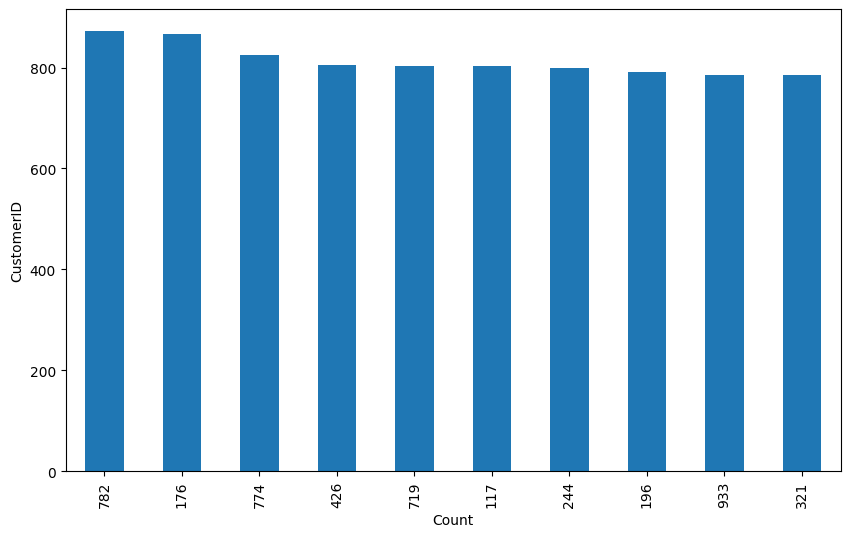

In [8]:
# Group by CustomerID and sum the total purchase amount
customer_total_purchase = df_transactions.groupby('CustomerID')['TotalPurchase'].sum()

# Get the top 10 customers
top_10_customers = customer_total_purchase.nlargest(10)

# Show the top 10 customers
plt.figure(figsize=(10, 6))
top_10_customers.plot(kind='bar')
plt.xlabel('Count')
plt.ylabel('CustomerID')
plt.show()

In [9]:
# Filtering
result = df_transactions.query('Quantity >= 30 & Country == "United Kingdom"')
result.head()

,CustomerID,InvoiceNo,UnitPrice,Quantity,InvoiceDate,Country,TotalPurchase
816,409,1817,11.275259,37.0,2022-08-11,United Kingdom,417.184582
886,444,1887,11.918346,36.0,2022-04-15,United Kingdom,429.060466
1357,679,2358,7.769012,40.0,2022-07-14,United Kingdom,310.760481
1963,982,2964,9.206207,40.0,2022-01-02,United Kingdom,368.248264


In [10]:
mask = (df_transactions['Quantity'] >= 30) & (df_transactions['Country'] == 'United Kingdom')

print('Step 1: masking')
print(mask)

Step 1: masking
0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool


In [11]:
result = df_transactions[mask]
print('\nStep 2: filter with mask')
result.head()


Step 2: filter with mask


,CustomerID,InvoiceNo,UnitPrice,Quantity,InvoiceDate,Country,TotalPurchase
816,409,1817,11.275259,37.0,2022-08-11,United Kingdom,417.184582
886,444,1887,11.918346,36.0,2022-04-15,United Kingdom,429.060466
1357,679,2358,7.769012,40.0,2022-07-14,United Kingdom,310.760481
1963,982,2964,9.206207,40.0,2022-01-02,United Kingdom,368.248264
